In [1]:
# ==========================================
# KMEANS CLUSTERING ON PCA COMPONENTS
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# Load PCA transformed data
X_pca = pd.read_csv("pca_transformed_data.csv")

print("Shape of PCA Data:", X_pca.shape)
X_pca.head()

Shape of PCA Data: (52585, 4)


,PC1,PC2,PC3,PC4
0,1.430232,-0.179257,0.420852,0.714503
1,-0.766060,-0.089197,0.474760,1.193052
2,0.947601,-1.791220,-0.727637,0.934385
3,1.058002,-1.251430,-0.679176,0.902017
4,-1.347428,0.284817,1.078110,-0.883435


In [3]:
print("Any nulls?", X_pca.isnull().sum().sum())
print("Any infinite values?", np.isinf(X_pca.values).sum())

Any nulls? 0
Any infinite values? 0


Elbow method 

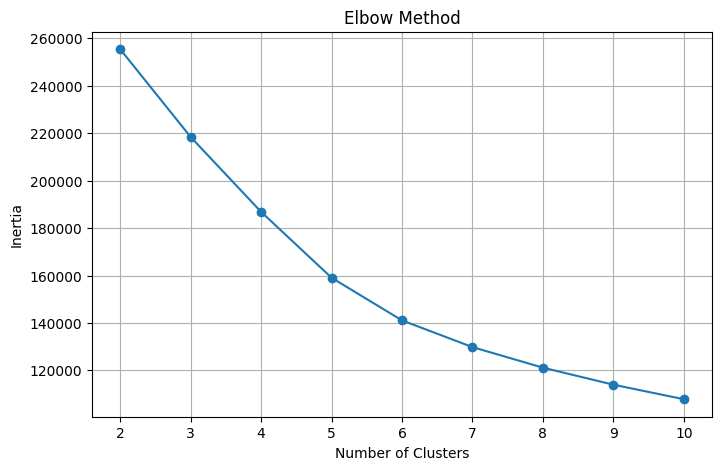

In [ ]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

Silhouette Score

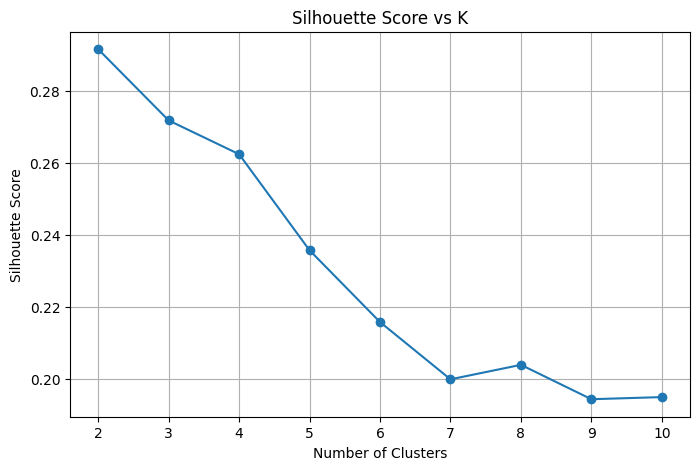

K=2 → Silhouette Score = 0.2917
K=3 → Silhouette Score = 0.2719
K=4 → Silhouette Score = 0.2625
K=5 → Silhouette Score = 0.2358
K=6 → Silhouette Score = 0.2158
K=7 → Silhouette Score = 0.1999
K=8 → Silhouette Score = 0.2039
K=9 → Silhouette Score = 0.1944
K=10 → Silhouette Score = 0.1950


In [ ]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

for k, score in zip(K_range, silhouette_scores):
    print(f"K={k} → Silhouette Score = {score:.4f}")

Calinski-Harabasz Score

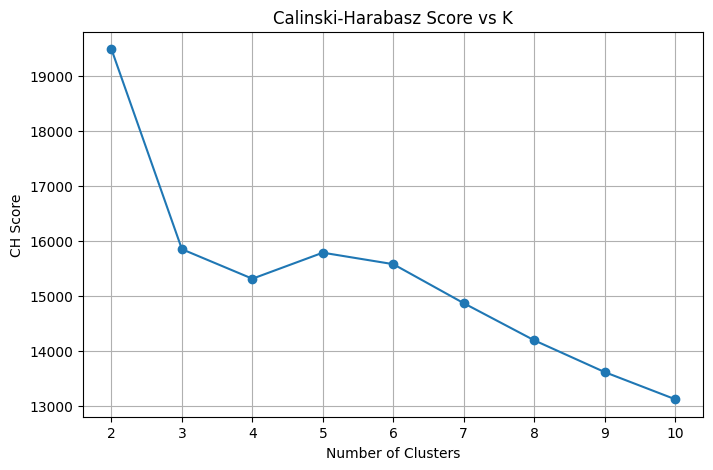

In [ ]:
# Replace with your actual CH scores
ch_scores = [...]   # e.g., [19000, 18500, 15313, ...]

fig, ax = plt.subplots()
ax.plot(K_range, ch_scores, marker='o', markersize=10, linewidth=2, color='#4C72B0', label='CH Score')
ax.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Chosen k = 4')
ax.set_xlabel('Number of Clusters', fontweight='bold')
ax.set_ylabel('Calinski‑Harabasz Score', fontweight='bold')
ax.set_title('Calinski‑Harabasz Score vs Number of Clusters', fontweight='bold', fontsize=16)
ax.legend(loc='best')
ax.grid(True, linestyle='--', alpha=0.7)

ax.annotate('Chosen k = 4',
            xy=(4, ch_scores[2]), xytext=(4.2, ch_scores[2]*1.02),
            arrowprops=dict(arrowstyle='->', color='darkred'),
            fontsize=12, color='darkred')

plt.tight_layout()
plt.savefig('ch_plot.png', dpi=300, bbox_inches='tight')
plt.show()

Davies-Bouldin Score

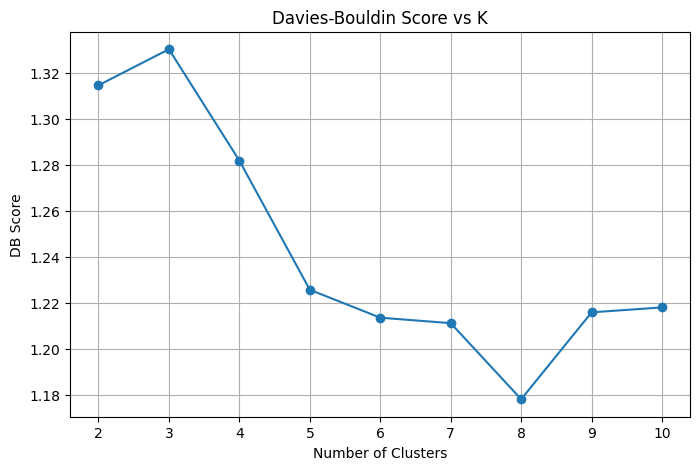

In [7]:
db_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = kmeans.fit_predict(X_pca)
    score = davies_bouldin_score(X_pca, labels)
    db_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, db_scores, marker='o')
plt.title("Davies-Bouldin Score vs K")
plt.xlabel("Number of Clusters")
plt.ylabel("DB Score")
plt.grid(True)
plt.show()